In [1]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import pandas as pd
import inspect
from scipy.fftpack import dct

In [5]:
lines = inspect.getsource(librosa.feature.rms)
print(lines)

def rms(
    *,
    y: Optional[np.ndarray] = None,
    S: Optional[np.ndarray] = None,
    frame_length: int = 2048,
    hop_length: int = 512,
    center: bool = True,
    pad_mode: _PadMode = "constant",
    dtype: DTypeLike = np.float32,
) -> np.ndarray:
    """Compute root-mean-square (RMS) value for each frame, either from the
    audio samples ``y`` or from a spectrogram ``S``.

    Computing the RMS value from audio samples is faster as it doesn't require
    a STFT calculation. However, using a spectrogram will give a more accurate
    representation of energy over time because its frames can be windowed,
    thus prefer using ``S`` if it's already available.

    Parameters
    ----------
    y : np.ndarray [shape=(..., n)] or None
        (optional) audio time series. Required if ``S`` is not input.
        Multi-channel is supported.
    S : np.ndarray [shape=(..., d, t)] or None
        (optional) spectrogram magnitude. Required if ``y`` is not input.
    frame_length : in

In [8]:
lines = inspect.getsource(librosa.frames_to_time)
print(lines)

def frames_to_time(
    frames: _ScalarOrSequence[_IntLike_co],
    *,
    sr: float = 22050,
    hop_length: int = 512,
    n_fft: Optional[int] = None,
) -> Union[np.floating[Any], np.ndarray]:
    """Convert frame counts to time (seconds).

    Parameters
    ----------
    frames : np.ndarray [shape=(n,)]
        frame index or vector of frame indices
    sr : number > 0 [scalar]
        audio sampling rate
    hop_length : int > 0 [scalar]
        number of samples between successive frames
    n_fft : None or int > 0 [scalar]
        Optional: length of the FFT window.
        If given, time conversion will include an offset of ``n_fft // 2``
        to counteract windowing effects when using a non-centered STFT.

    Returns
    -------
    times : np.ndarray [shape=(n,)]
        time (in seconds) of each given frame number::

            times[i] = frames[i] * hop_length / sr

    See Also
    --------
    time_to_frames : convert time values to frame indices
    frames_to_samp

Useful info on RMSE (RMS Energy) https://musicinformationretrieval.com/energy.html

Text(0.5, 1.0, 'StudySeq1')

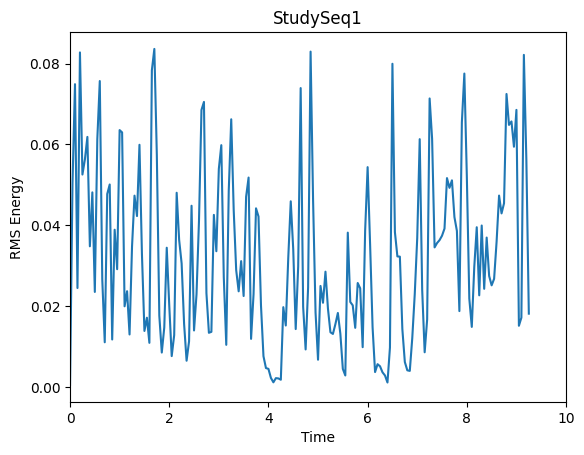

In [12]:
studyseq1_path = "StudySeq1.wav"
studyseq1, sr = librosa.load(studyseq1_path, sr = 44100)

frame_length = 2205 # Samples Per Frame = Sample Rate / FPS = 44100 / 20 = 2205
hop_length = 2205

rms_studyseq1 = librosa.feature.rms(y=studyseq1, hop_length=hop_length, frame_length=frame_length, center=False)[0]

frames = range(len(rms_studyseq1))
t = librosa.frames_to_time(frames, hop_length=hop_length, sr=sr)
plt.plot(t, rms_studyseq1)
plt.xlabel("Time")
plt.ylabel("RMS Energy")
plt.xlim((0,10))
plt.title("StudySeq1")

range(0, 401)


Text(0.5, 1.0, 'StudySeq1')

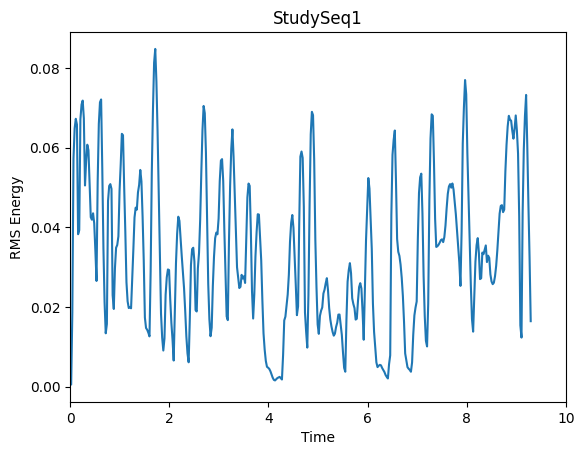

In [49]:
studyseq1_path = "StudySeq1.wav"
studyseq1, sr = librosa.load(studyseq1_path)

rms_studyseq1 = librosa.feature.rms(y=studyseq1)[0]

frames = range(len(rms_studyseq1))
print(frames)
t = librosa.frames_to_time(frames)
plt.plot(t, rms_studyseq1)
plt.xlabel("Time")
plt.ylabel("RMS Energy")
plt.xlim((0,10))
plt.title("StudySeq1")

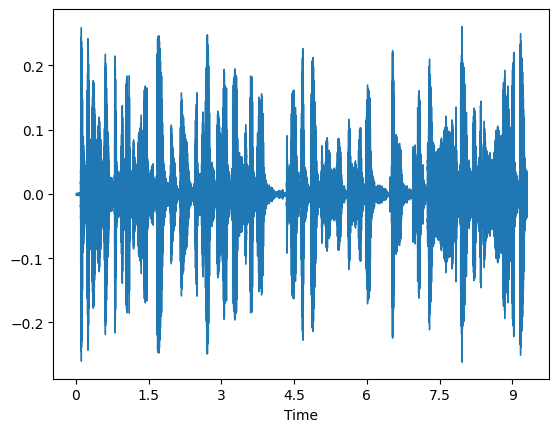

In [16]:
librosa.display.waveshow(studyseq1, sr=sr)

Mean RMS Energy (scaled so that max is 1) =  0.39572784
Mean Energy (scaled so that max is 1) =  0.20847450321461095
Mean RMS Energy =  0.03354188
Mean Energ =  3.067358006303089


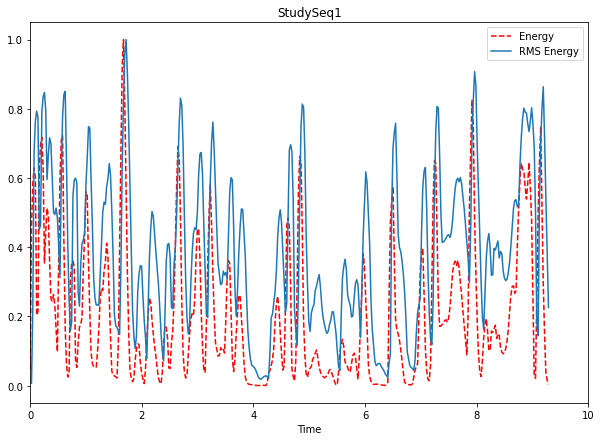

In [122]:
# Energy of Studyseq1 (Source: https://musicinformationretrieval.com/energy.html)
frame_length = 2048
hop_length = 512
x = studyseq1
energy_studyseq1 = np.array([sum(abs(x[i:i+frame_length]**2)) for i in range(0, len(x), hop_length)])

frames = range(len(energy_studyseq1))
t = librosa.frames_to_time(frames, hop_length=hop_length)
plt.figure(figsize=(10,7))
plt.plot(t, energy_studyseq1/np.max(energy_studyseq1), "-r", linestyle='--', label='Energy')
plt.xlabel("Time")
plt.title("StudySeq1")
plt.plot(t, rms_studyseq1/np.max(rms_studyseq1), label="RMS Energy")
plt.xlim((0,10))
plt.legend()

print("Mean RMS Energy (scaled so that max is 1) = ", np.mean(rms_studyseq1/np.max(rms_studyseq1)))
print("Mean Energy (scaled so that max is 1) = ", np.mean(energy_studyseq1/np.max(energy_studyseq1)))

print("Mean RMS Energy = ", np.mean(rms_studyseq1))
print("Mean Energ = ", np.mean(energy_studyseq1))

In [3]:
#calculate single compact MFCC for the entire audio file
audio, sr = librosa.load("StudySeq1.wav")
frame_size = 2048
hop_length = 512
# Apply window function to each frame
frames = librosa.util.frame(audio, frame_length=frame_size, hop_length=hop_length)
frames = frames * np.hamming(frame_size).reshape((-1, 1))
# Calculate the absolute value squared of the FFT of each windowed frame
power_spectrum = np.abs(librosa.stft(frames, n_fft=frame_size))**2

# Apply the mel filterbank to the power spectrum
mel_filterbank = librosa.filters.mel(sr=sr, n_fft=frame_size, n_mels=26)
mel_energy = np.dot(mel_filterbank, power_spectrum)

# Take the logarithm of the energy in each filter
log_mel_energy = np.log(mel_energy + 1e-10)  # Add a small constant to avoid taking the log of zero

# Take the DCT of the log filterbank energies
mfcc = librosa.feature.mfcc(S=log_mel_energy, n_mfcc=13)

# Keep the first MFCC coefficient
mean_mfcc = np.mean(mfcc, axis=1)
single_compact_mfcc = np.mean(mean_mfcc)

print(single_compact_mfcc)


C:\Users\goyal\anaconda3\envs\mlp\lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=397
  warnings.warn(


-25.328711109560384


In [74]:
#calculate average spectral centroid for the entire audio file
audio, sr = librosa.load("StudySeq1.wav")
frame_size = 2048
hop_length = 512
num_of_frames = int(np.floor(audio.shape[0]/hop_length))
print(audio.shape,num_of_frames)
stft = librosa.stft(audio, n_fft=frame_size, hop_length=hop_length)
spectral_centroids = librosa.feature.spectral_centroid(S=np.abs(stft), sr=sr)
#calculate number of frames
print(len(spectral_centroids[0]))
mean_spectral_centroid = np.mean(spectral_centroids)
print(mean_spectral_centroid)

(205095,) 400
401
1725.0130423452604


In [79]:
#calculate average spectral centroid for all files 
Conds = ['Cond_BA', 'Cond_BT', 'Cond_N', 'Cond_M', 'Cond_SA', 'Cond_SB', 'Cond_SC', 'Cond_SD', 'Cond_SE']
for cond in Conds:
    for i in range(1,41):
        studyseq_path = "StudySeq" + str(i) + ".wav"
        studyseq, sr = librosa.load(studyseq_path)
        frame_size = 2048
        hop_length = 512
        num_of_frames = int(np.floor(studyseq.shape[0]/hop_length))
        stft = librosa.stft(studyseq, n_fft=frame_size, hop_length=hop_length)
        spectral_centroids = librosa.feature.spectral_centroid(S=np.abs(stft), sr=sr)
        mean_spectral_centroid = np.mean(spectral_centroids)
        df_rows = df_rows + [np.append('StudySeq' + str(i), mean_spectral_centroid)]
    
df_spectral_centroid = pd.DataFrame(df_rows, columns=['StudySeq', 'Mean_Spectral_Centroid'])
#save csv file to dataset folder
write_path = "../Appropriateness_Features/Mean_Spectral_Centroid.csv"
df_spectral_centroid.to_csv(write_path)


# Computing RMS Energy for all audio files

In [77]:
df_rows = []

for i in range(1,41):
    studyseq_path = "StudySeq" + str(i) + ".wav"
    studyseq, sr = librosa.load(studyseq_path)
    
    hop_length = int(np.floor(studyseq.shape[0]/num_of_features))
    
    studyseq_rms = librosa.feature.rms(y=studyseq, hop_length = hop_length)[0]
    
    df_rows = df_rows + [np.append('StudySeq' + str(i), studyseq_rms)]
print(df_rows)

[array(['StudySeq1', '0.0004108432', '0.059860766', '0.011711467',
       '0.04551383', '0.001545529', '0.026990041', '0.004861486',
       '0.03538603', '0.026731715', '0.012528827'], dtype='<U32'), array(['StudySeq2', '0.01390915', '0.057282243', '0.08149197',
       '0.043253254', '0.024215825', '0.049908157', '0.06422315',
       '0.047450725', '0.03617239', '0.0026146714'], dtype='<U32'), array(['StudySeq3', '0.0104095405', '0.031238928', '0.018126471',
       '0.002960332', '0.053587724', '0.04935557', '0.013575574',
       '0.0070140758', '0.041676007', '0.0025718545'], dtype='<U32'), array(['StudySeq4', '0.042731944', '0.022932567', '0.014719458',
       '0.056074787', '0.057409603', '0.011882581', '0.02868907',
       '0.01248648', '0.02595765', '0.024902731'], dtype='<U32'), array(['StudySeq5', '0.014422916', '0.047441147', '0.0037849536',
       '0.025681006', '0.03403193', '0.019234475', '0.03818443',
       '0.016097762', '0.018157823', '0.002737761'], dtype='<U32'), array

In [68]:
df_rms = pd.DataFrame(df_rows, columns=['StudySeq'] + ['RMS_Energy' + str(x) for x in range(1,11)])
df_rms.to_csv("RMS_Energy.csv")

# Computing "RMS Weighted Joint Distance Score" with scaled and shifted rms energy

In [3]:
df = pd.DataFrame(columns = ['Spine_RMS_Distance_Score', 'Spine1_RMS_Distance_Score', 'Spine2_RMS_Distance_Score', 
                             'Spine3_RMS_Distance_Score', 'LeftShoulder_RMS_Distance_Score', 'LeftArm_RMS_Distance_Score', 
                             'LeftForeArm_RMS_Distance_Score', 'LeftHand_RMS_Distance_Score', 
                             'RightShoulder_RMS_Distance_Score', 'RightArm_RMS_Distance_Score', 
                             'RightForeArm_RMS_Distance_Score', 'RightHand_RMS_Distance_Score', 'Neck_RMS_Distance_Score', 
                             'Neck1_RMS_Distance_Score', 'Head_RMS_Distance_Score'])
Conds = ['Cond_BA', 'Cond_BT', 'Cond_N', 'Cond_M', 'Cond_SA', 'Cond_SB', 'Cond_SC', 'Cond_SD', 'Cond_SE']

for cond in Conds:
    for i in range(1,41):
        studyseq_motion_path = "../" + cond + "/joint_distances_between_frames/" + "StudySeq" + str(i) + ".csv"
        studyseq_motion = pd.read_csv(studyseq_motion_path).iloc[:,1:] # Drop the first column as it is indexing
        num_of_frames = studyseq_motion.shape[0] 
        # Note that num_of_frames here does not refer to the number of frames in the StudySeq bvh file
        # It infact refers to that number - 1.
        
        studyseq_audio_path = "StudySeq" + str(i) + ".wav"
        studyseq_audio, sr = librosa.load(studyseq_audio_path)

        hop_length = int(np.floor(studyseq_audio.shape[0]/(num_of_frames-1)))
        studyseq_rms = librosa.feature.rms(studyseq_audio, hop_length = hop_length)[0]
        
        # Scaling and Shifting the rms so that it's max value is 1 and its mean 0.
        
        studyseq_rms = studyseq_rms - np.mean(studyseq_rms) # 0 mean
        studyseq_rms = studyseq_rms / np.max(studyseq_rms) # max 1

        # Weighting the joint distances between frames with the rms energy
        studyseq_weighted_motion = studyseq_motion.multiply(studyseq_rms, axis = 'index')
        
        # Taking the avg of scores for each joint
        avg_weighted_motion = studyseq_weighted_motion.mean()
        
        # Adding Studyseq and Score to a dataframe
        rename_dict = dict(zip(avg_weighted_motion.index, [x[:x.index("_")] + "_RMS_Distance_Score" for x in studyseq_motion.columns]))
        avg_weighted_motion = avg_weighted_motion.rename(rename_dict)
        avg_weighted_motion = avg_weighted_motion.rename(cond + "/StudySeq" + str(i))
        df = df.append(avg_weighted_motion)

write_path = "../Appropriateness_Features/RMS_Distance_scores.csv"
df.to_csv(write_path)

KeyboardInterrupt: 

# Computing "RMS Weighted Joint Distance Score" without scaled and shifted rms energy (frame by frame)

In [8]:
df = pd.DataFrame(columns = ['Spine_RMS_Distance_Score', 'Spine1_RMS_Distance_Score', 'Spine2_RMS_Distance_Score', 
                             'Spine3_RMS_Distance_Score', 'LeftShoulder_RMS_Distance_Score', 'LeftArm_RMS_Distance_Score', 
                             'LeftForeArm_RMS_Distance_Score', 'LeftHand_RMS_Distance_Score', 
                             'RightShoulder_RMS_Distance_Score', 'RightArm_RMS_Distance_Score', 
                             'RightForeArm_RMS_Distance_Score', 'RightHand_RMS_Distance_Score', 'Neck_RMS_Distance_Score', 
                             'Neck1_RMS_Distance_Score', 'Head_RMS_Distance_Score'])
Conds = ['Cond_BA', 'Cond_BT', 'Cond_N', 'Cond_M', 'Cond_SA', 'Cond_SB', 'Cond_SC', 'Cond_SD', 'Cond_SE']

for cond in Conds:
    for i in range(1,41):
        print(cond)
        studyseq_motion_path = "../" + cond + "/joint_distances_between_frames/" + "StudySeq" + str(i) + ".csv"
        studyseq_motion = pd.read_csv(studyseq_motion_path).iloc[:,1:] # Drop the first column as it is indexing

        studyseq_audio_path = "StudySeq" + str(i) + ".wav"
        studyseq_audio, sr = librosa.load(studyseq_audio_path, sr=44100)

        frame_length = 2205 # Samples Per Frame = Sample Rate / FPS = 44100 / 20 = 2205
        hop_length = 2205

        studyseq_rms = librosa.feature.rms(studyseq_audio, hop_length=hop_length, frame_length=frame_length, center=False)[0]
            
        # Need to do a check for the Studyseqs of Cond_M since some of the videos have 1 additional frame.
        num_of_frames_motion = studyseq_motion.shape[0] + 1
        num_of_frames_audio = np.size(studyseq_rms)
        if (cond == 'Cond_M' and num_of_frames_motion == num_of_frames_audio + 1):
            # If the Cond_M studyseq has an additional frame dont discard the last frame of audio:
            studyseq_weighted_motion = studyseq_motion.multiply(studyseq_rms, axis = 'index')
        else:
            # Weighting the joint distances between frames with the rms energy
            studyseq_weighted_motion = studyseq_motion.multiply(studyseq_rms[:-1], axis = 'index')

        # Taking the avg of scores for each joint
        avg_weighted_motion = studyseq_weighted_motion.mean()

        # Adding Studyseq and Score to a dataframe
        rename_dict = dict(zip(avg_weighted_motion.index, [x[:x.index("_")] + "_RMS_Distance_Score" for x in studyseq_motion.columns]))
        avg_weighted_motion = avg_weighted_motion.rename(rename_dict)
        avg_weighted_motion = avg_weighted_motion.rename(cond + "/StudySeq" + str(i))
        print(avg_weighted_motion)
        df = df.append(avg_weighted_motion)
        print(df)

write_path = "../Appropriateness_Features/RMS_Distance_scores_unscaled.csv"
df.to_csv(write_path)

Cond_BA
Spine_RMS_Distance_Score            0.000000
Spine1_RMS_Distance_Score           0.000896
Spine2_RMS_Distance_Score           0.000899
Spine3_RMS_Distance_Score           0.001146
LeftShoulder_RMS_Distance_Score     0.002003
LeftArm_RMS_Distance_Score          0.002010
LeftForeArm_RMS_Distance_Score      0.002387
LeftHand_RMS_Distance_Score         0.003272
RightShoulder_RMS_Distance_Score    0.003285
RightArm_RMS_Distance_Score         0.003822
RightForeArm_RMS_Distance_Score     0.004442
RightHand_RMS_Distance_Score        0.004581
Neck_RMS_Distance_Score             0.005130
Neck1_RMS_Distance_Score            0.005666
Head_RMS_Distance_Score             0.008184
Name: Cond_BA/StudySeq1, dtype: float64
                   Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                       0.0                   0.000896   

                   Spine2_RMS_Distance_Score  Spine3_RMS_Distance_Score  \
Cond_BA/StudySeq1                   0.000899         

Spine_RMS_Distance_Score            0.000000
Spine1_RMS_Distance_Score           0.000384
Spine2_RMS_Distance_Score           0.000397
Spine3_RMS_Distance_Score           0.000596
LeftShoulder_RMS_Distance_Score     0.000931
LeftArm_RMS_Distance_Score          0.000948
LeftForeArm_RMS_Distance_Score      0.001212
LeftHand_RMS_Distance_Score         0.001560
RightShoulder_RMS_Distance_Score    0.001584
RightArm_RMS_Distance_Score         0.001942
RightForeArm_RMS_Distance_Score     0.002418
RightHand_RMS_Distance_Score        0.002553
Neck_RMS_Distance_Score             0.002863
Neck1_RMS_Distance_Score            0.002697
Head_RMS_Distance_Score             0.004678
Name: Cond_BA/StudySeq8, dtype: float64
                   Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                       0.0                   0.000896   
Cond_BA/StudySeq2                       0.0                   0.000776   
Cond_BA/StudySeq3                       0.0                   0

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0                   0.000478   
Cond_BA/StudySeq4                        0.0                   0.000417   
Cond_BA/StudySeq5                        0.0                   0.000264   
Cond_BA/StudySeq6                        0.0                   0.000418   
Cond_BA/StudySeq7                        0.0                   0.000315   
Cond_BA/StudySeq8                        0.0                   0.000384   
Cond_BA/StudySeq9                        0.0                   0.000507   
Cond_BA/StudySeq10                       0.0                   0.000546   
Cond_BA/StudySeq11                       0.0                   0.000749   
Cond_BA/StudySeq12                       0.0                   0.000376   
Cond_BA/StudySeq13       

Spine_RMS_Distance_Score            0.000000
Spine1_RMS_Distance_Score           0.000320
Spine2_RMS_Distance_Score           0.000321
Spine3_RMS_Distance_Score           0.000464
LeftShoulder_RMS_Distance_Score     0.000779
LeftArm_RMS_Distance_Score          0.000781
LeftForeArm_RMS_Distance_Score      0.000965
LeftHand_RMS_Distance_Score         0.001321
RightShoulder_RMS_Distance_Score    0.001324
RightArm_RMS_Distance_Score         0.001551
RightForeArm_RMS_Distance_Score     0.002118
RightHand_RMS_Distance_Score        0.002146
Neck_RMS_Distance_Score             0.002373
Neck1_RMS_Distance_Score            0.002386
Head_RMS_Distance_Score             0.002985
Name: Cond_BT/StudySeq26, dtype: float64
                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0                   0.000896   
Cond_BA/StudySeq2                        0.0                   0.000776   
Cond_BA/StudySeq3                        0.0               

KeyboardInterrupt: 

# Computing Windowed "RMS Weighted Joint Distance Score" without scaled and shifted rms energy

In [49]:
df = pd.DataFrame(columns = ['Spine_RMS_Distance_Score', 'Spine1_RMS_Distance_Score', 'Spine2_RMS_Distance_Score', 
                             'Spine3_RMS_Distance_Score', 'LeftShoulder_RMS_Distance_Score', 'LeftArm_RMS_Distance_Score', 
                             'LeftForeArm_RMS_Distance_Score', 'LeftHand_RMS_Distance_Score', 
                             'RightShoulder_RMS_Distance_Score', 'RightArm_RMS_Distance_Score', 
                             'RightForeArm_RMS_Distance_Score', 'RightHand_RMS_Distance_Score', 'Neck_RMS_Distance_Score', 
                             'Neck1_RMS_Distance_Score', 'Head_RMS_Distance_Score'])
Conds = ['Cond_BA', 'Cond_BT', 'Cond_N', 'Cond_M', 'Cond_SA', 'Cond_SB', 'Cond_SC', 'Cond_SD', 'Cond_SE']

for cond in Conds:
    for i in range(1,41):
        print(cond)
        studyseq_motion_path = "../" + cond + "/joint_distances_between_frames/" + "StudySeq" + str(i) + ".csv"
        studyseq_motion = pd.read_csv(studyseq_motion_path).iloc[:,1:] # Drop the first column as it is indexing

        studyseq_audio_path = "StudySeq" + str(i) + ".wav"
        studyseq_audio, sr = librosa.load(studyseq_audio_path, sr=44100)

        frame_length = 2205 # Samples Per Frame = Sample Rate / FPS = 44100 / 20 = 2205
        hop_length = 2205

        studyseq_rms = librosa.feature.rms(studyseq_audio, hop_length=hop_length, frame_length=frame_length, center=False)[0]
        
        # Need to do a check for the Studyseqs of Cond_M since some of the videos have 1 additional frame.
        num_of_frames_motion = studyseq_motion.shape[0] + 1
        num_of_frames_audio = np.size(studyseq_rms)
        window_length = 10 # for windowing
        if (cond == 'Cond_M' and num_of_frames_motion == num_of_frames_audio + 1):
            # If the Cond_M studyseq has an additional frame dont discard the last frame of audio:
            studyseq_motion_array = studyseq_motion.to_numpy()
            windowed_motion = np.asarray([sum(studyseq_motion_array[x:x+window_length]) for x in range(0,len(studyseq_motion_array) - window_length + 1)])
            
            windowed_audio = np.asarray([sum(studyseq_rms[x:x+window_length]) for x in range(0,len(studyseq_rms) - window_length + 1)])
            windowed_audio = np.tile(np.reshape(windowed_audio, (np.shape(windowed_audio)[0],1)), (1,np.shape(windowed_motion)[1]))
            print(np.shape(windowed_audio), np.shape(windowed_motion))
            studyseq_weighted_motion = np.mean(windowed_motion * windowed_audio, axis=0)
        else:
            # Weighting the joint distances between frames with the rms energy
            studyseq_motion_array = studyseq_motion.to_numpy()
            windowed_motion = np.asarray([sum(studyseq_motion_array[x:x+window_length]) for x in range(0,len(studyseq_motion_array) - window_length + 1)])

            studyseq_rms = studyseq_rms[:-1]
            windowed_audio = np.asarray([sum(studyseq_rms[x:x+window_length]) for x in range(0,len(studyseq_rms) - window_length + 1)])
            windowed_audio = np.tile(np.reshape(windowed_audio, (np.shape(windowed_audio)[0],1)), (1,np.shape(windowed_motion)[1]))
            print(np.shape(windowed_audio), np.shape(windowed_motion))
            studyseq_weighted_motion = np.mean(windowed_motion * windowed_audio, axis=0)

        
        # Adding Studyseq and Score to a dataframe
        idx = [x[:x.index("_")] + "_RMS_Distance_Score" for x in studyseq_motion.columns]
        rms_distance_series = pd.Series(data=studyseq_weighted_motion, index=idx, name=cond + "/StudySeq" + str(i))
        df = df.append(rms_distance_series)

write_path = "../Appropriateness_Features/RMS_Distance_scores_windowed.csv"
df.to_csv(write_path)

Cond_BA
(176, 15) (176, 15)
Cond_BA
(206, 15) (206, 15)
Cond_BA
(142, 15) (142, 15)
Cond_BA
(160, 15) (160, 15)
Cond_BA
(178, 15) (178, 15)
Cond_BA
(192, 15) (192, 15)
Cond_BA
(190, 15) (190, 15)
Cond_BA
(190, 15) (190, 15)
Cond_BA
(186, 15) (186, 15)
Cond_BA
(186, 15) (186, 15)
Cond_BA
(186, 15) (186, 15)
Cond_BA
(228, 15) (228, 15)
Cond_BA
(158, 15) (158, 15)
Cond_BA
(226, 15) (226, 15)
Cond_BA
(182, 15) (182, 15)
Cond_BA
(244, 15) (244, 15)
Cond_BA
(184, 15) (184, 15)
Cond_BA
(240, 15) (240, 15)
Cond_BA
(238, 15) (238, 15)
Cond_BA
(218, 15) (218, 15)
Cond_BA
(212, 15) (212, 15)
Cond_BA
(148, 15) (148, 15)
Cond_BA
(180, 15) (180, 15)
Cond_BA
(192, 15) (192, 15)
Cond_BA
(210, 15) (210, 15)
Cond_BA
(196, 15) (196, 15)
Cond_BA
(158, 15) (158, 15)
Cond_BA
(178, 15) (178, 15)
Cond_BA
(204, 15) (204, 15)
Cond_BA
(212, 15) (212, 15)
Cond_BA
(160, 15) (160, 15)
Cond_BA
(208, 15) (208, 15)
Cond_BA
(180, 15) (180, 15)
Cond_BA
(192, 15) (192, 15)
Cond_BA
(198, 15) (198, 15)
Cond_BA
(202, 15) (2

Cond_SD
(218, 15) (218, 15)
Cond_SD
(212, 15) (212, 15)
Cond_SD
(148, 15) (148, 15)
Cond_SD
(180, 15) (180, 15)
Cond_SD
(192, 15) (192, 15)
Cond_SD
(210, 15) (210, 15)
Cond_SD
(196, 15) (196, 15)
Cond_SD
(158, 15) (158, 15)
Cond_SD
(178, 15) (178, 15)
Cond_SD
(204, 15) (204, 15)
Cond_SD
(212, 15) (212, 15)
Cond_SD
(160, 15) (160, 15)
Cond_SD
(208, 15) (208, 15)
Cond_SD
(180, 15) (180, 15)
Cond_SD
(192, 15) (192, 15)
Cond_SD
(198, 15) (198, 15)
Cond_SD
(202, 15) (202, 15)
Cond_SD
(202, 15) (202, 15)
Cond_SD
(138, 15) (138, 15)
Cond_SD
(180, 15) (180, 15)
Cond_SD
(134, 15) (134, 15)
Cond_SE
(176, 15) (176, 15)
Cond_SE
(206, 15) (206, 15)
Cond_SE
(142, 15) (142, 15)
Cond_SE
(160, 15) (160, 15)
Cond_SE
(178, 15) (178, 15)
Cond_SE
(192, 15) (192, 15)
Cond_SE
(190, 15) (190, 15)
Cond_SE
(190, 15) (190, 15)
Cond_SE
(186, 15) (186, 15)
Cond_SE
(186, 15) (186, 15)
Cond_SE
(186, 15) (186, 15)
Cond_SE
(228, 15) (228, 15)
Cond_SE
(158, 15) (158, 15)
Cond_SE
(226, 15) (226, 15)
Cond_SE
(182, 15) (1

# Graphs to show comparison between windowed and non windowed audio

<ipython-input-8-960d72574e56>:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


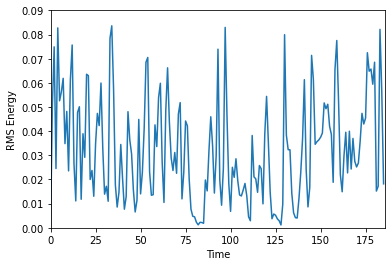

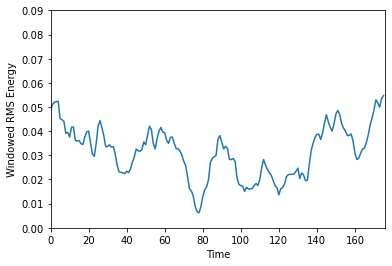

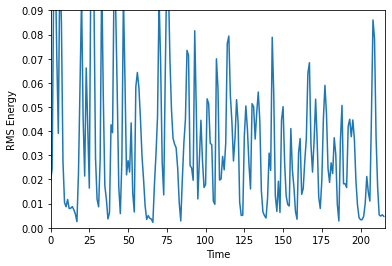

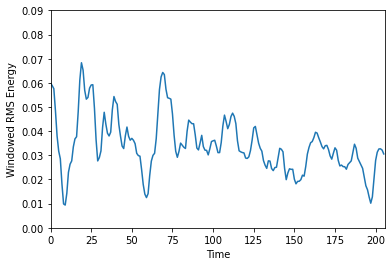

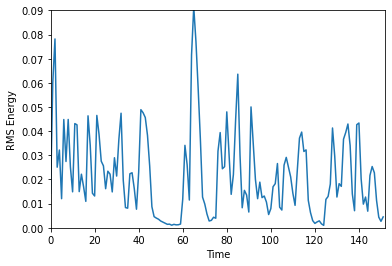

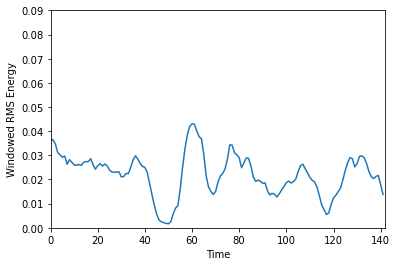

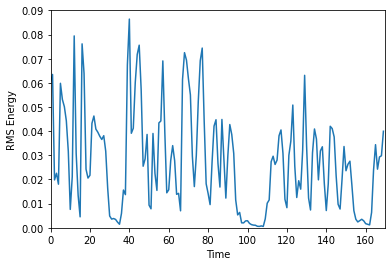

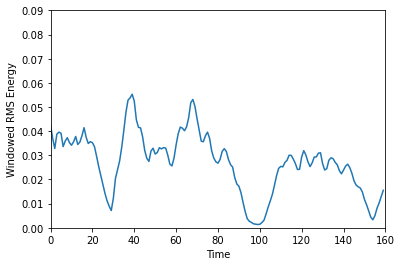

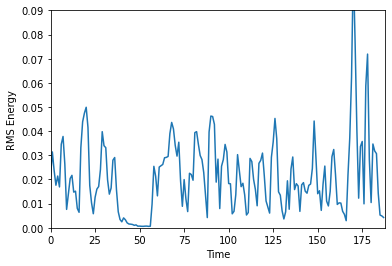

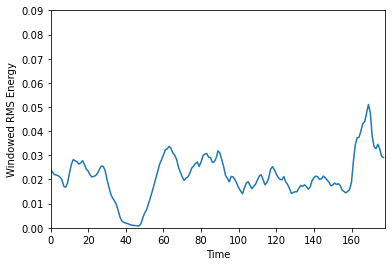

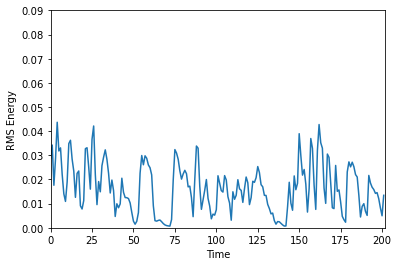

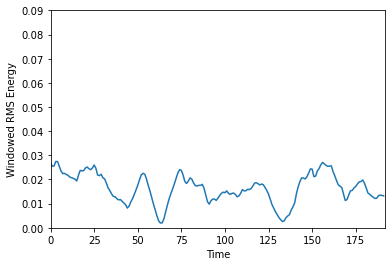

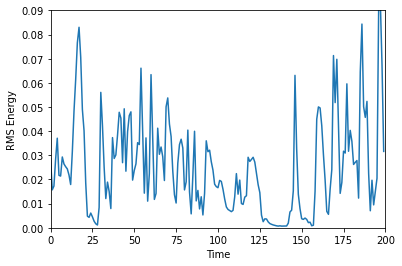

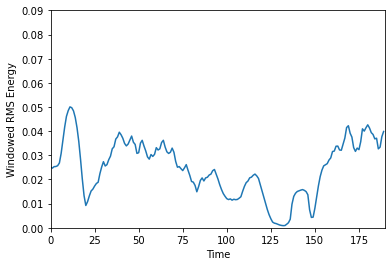

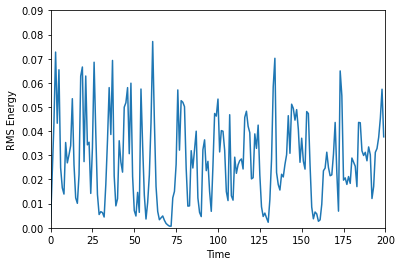

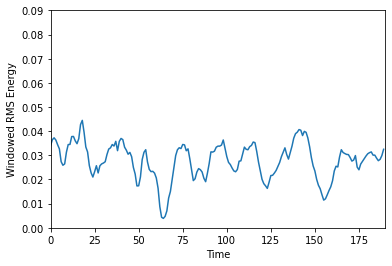

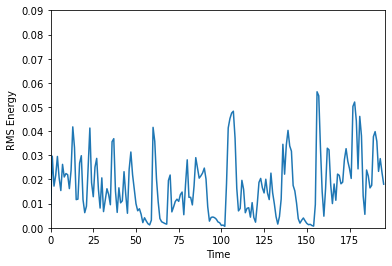

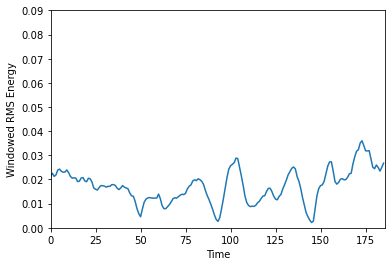

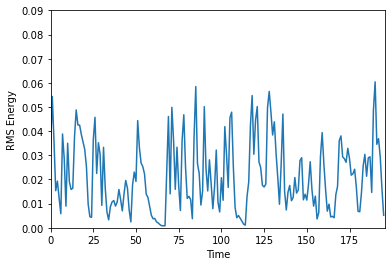

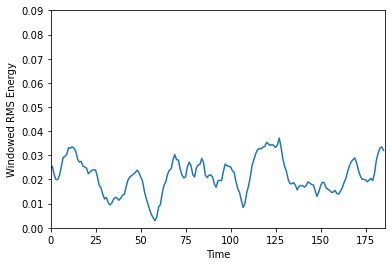

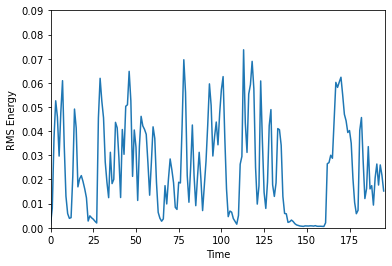

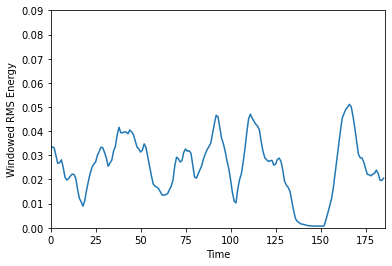

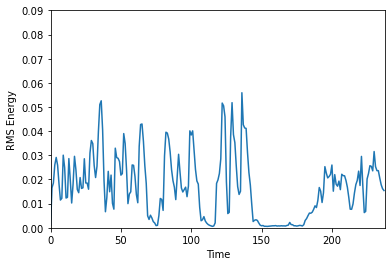

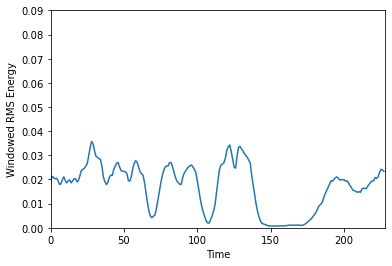

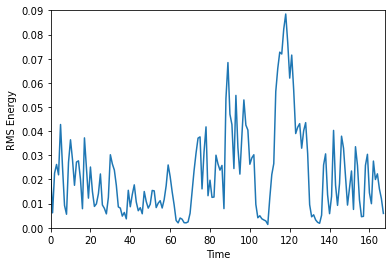

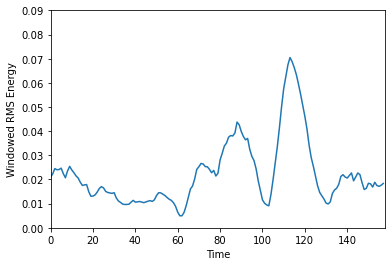

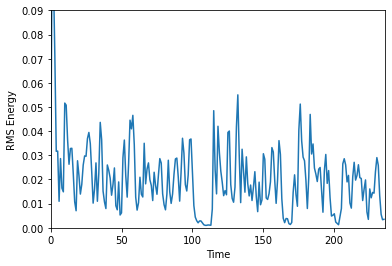

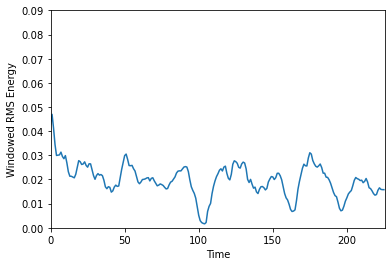

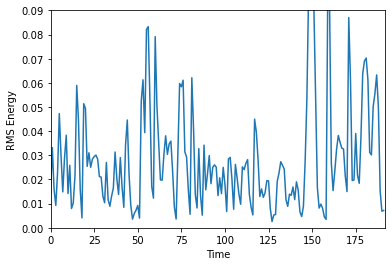

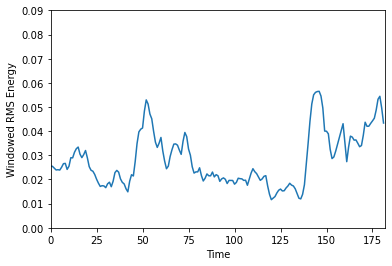

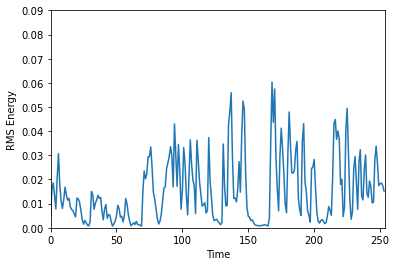

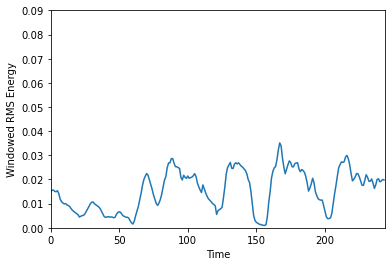

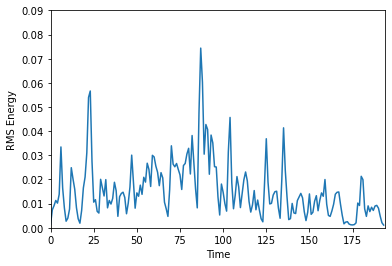

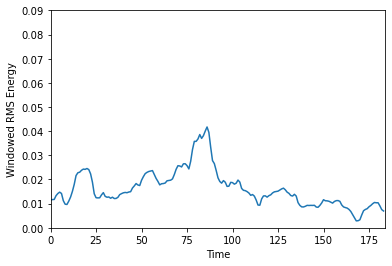

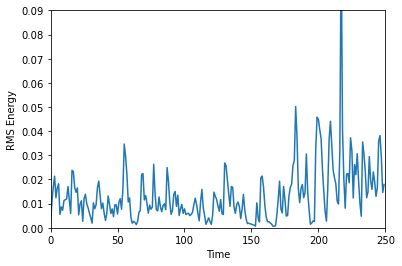

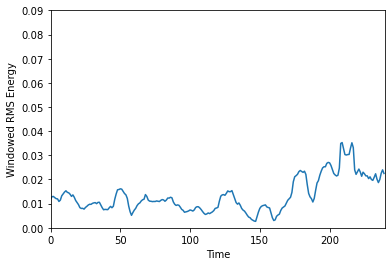

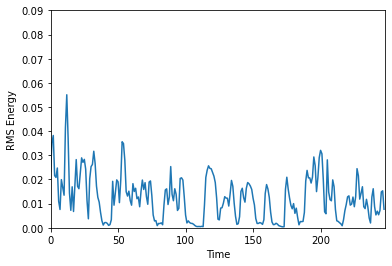

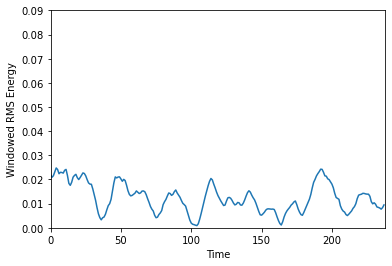

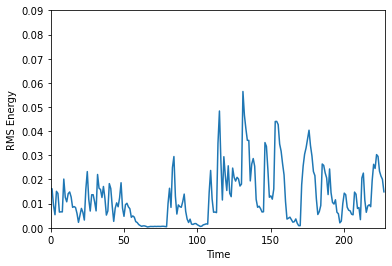

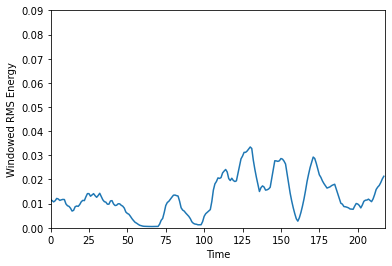

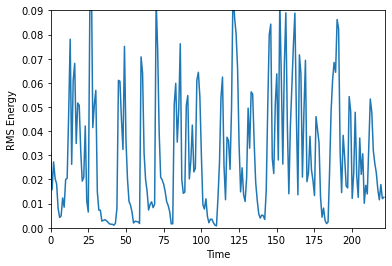

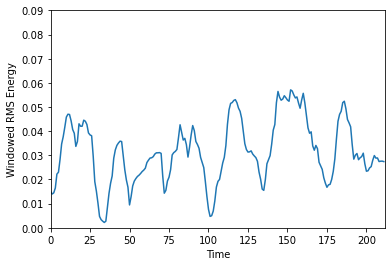

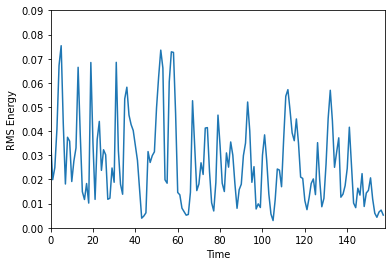

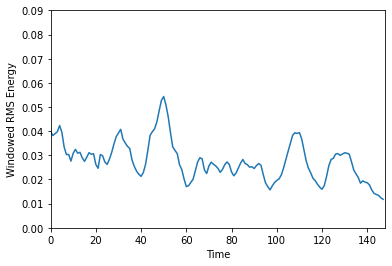

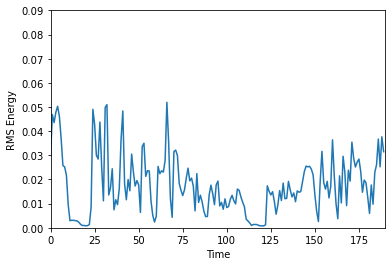

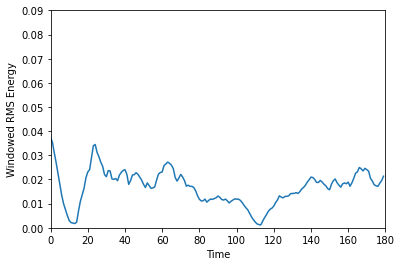

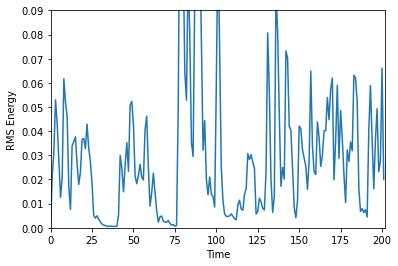

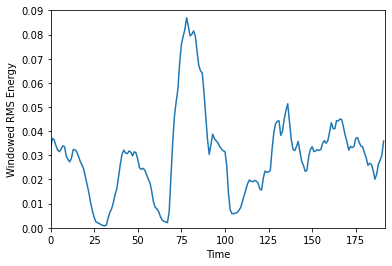

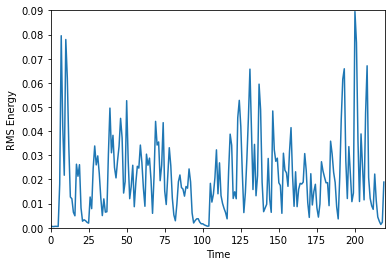

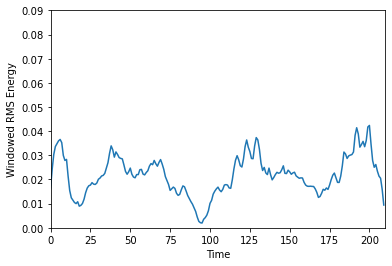

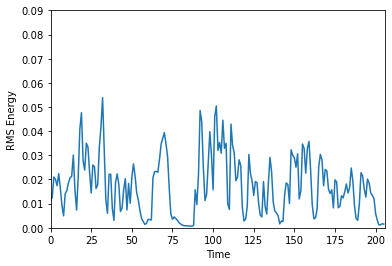

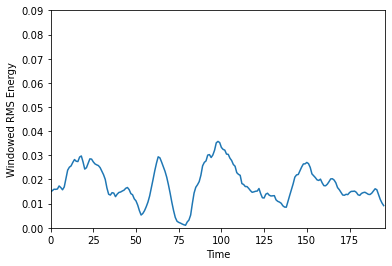

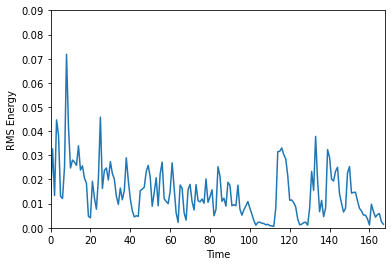

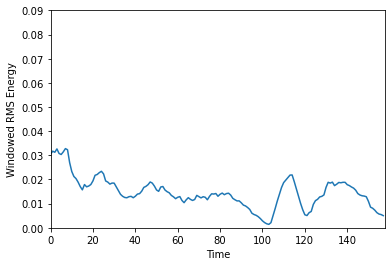

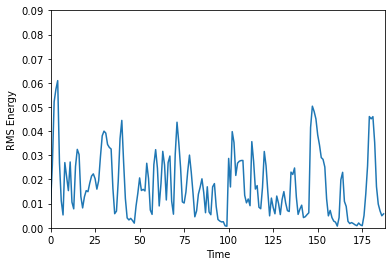

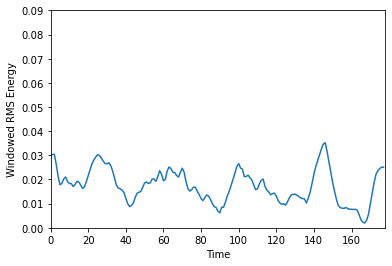

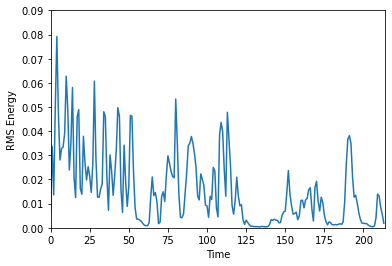

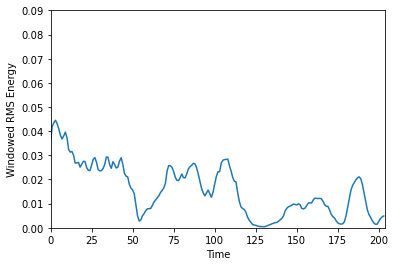

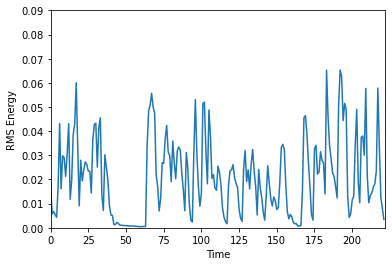

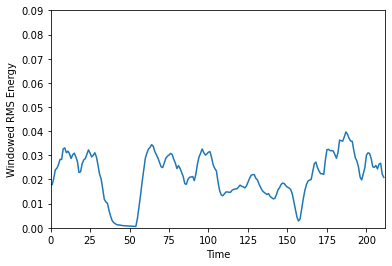

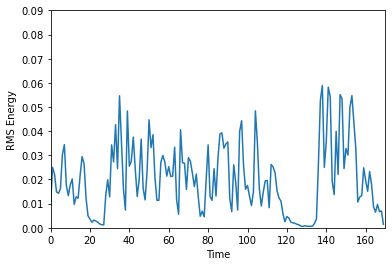

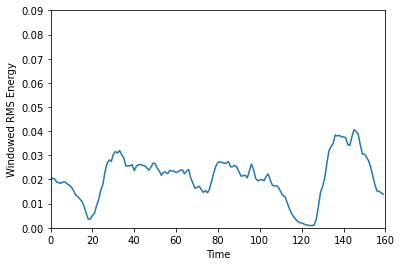

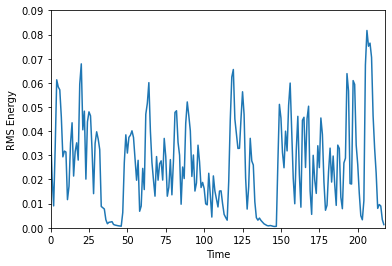

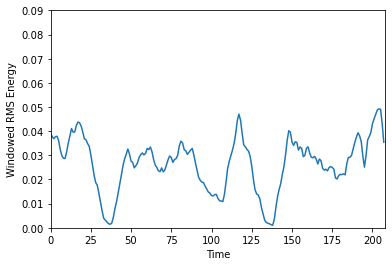

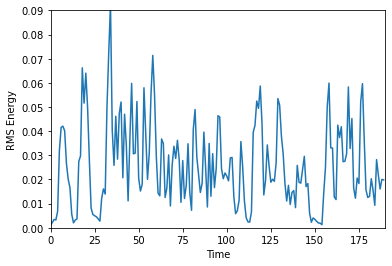

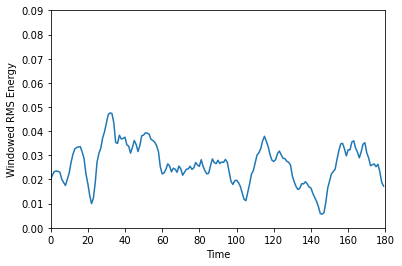

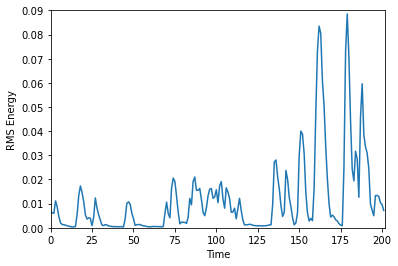

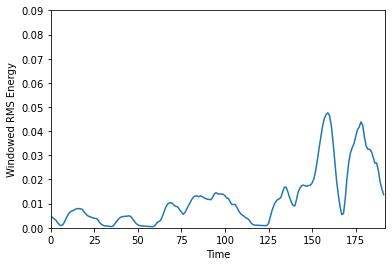

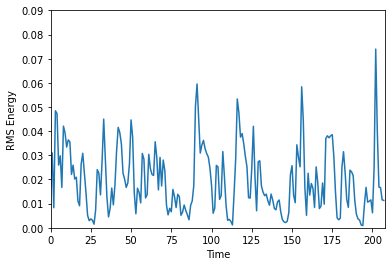

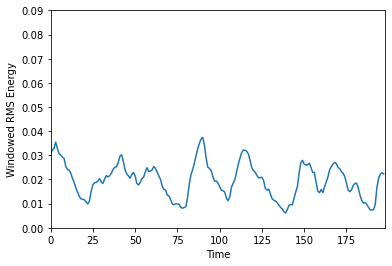

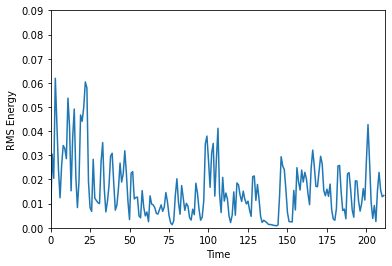

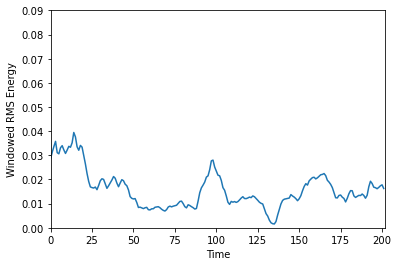

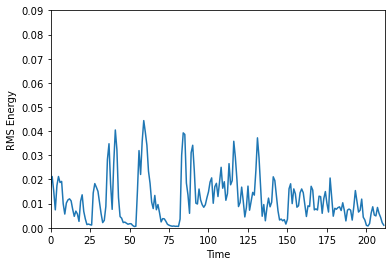

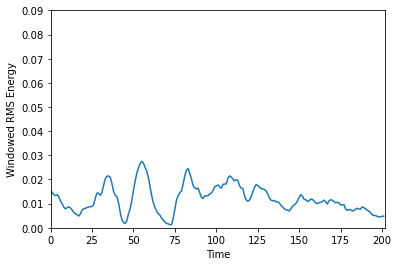

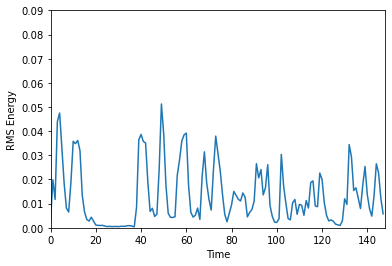

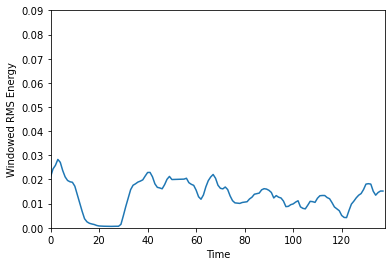

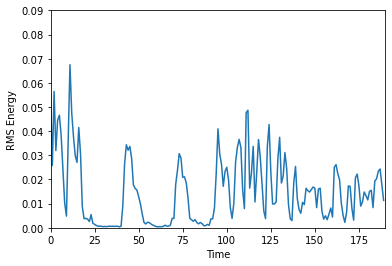

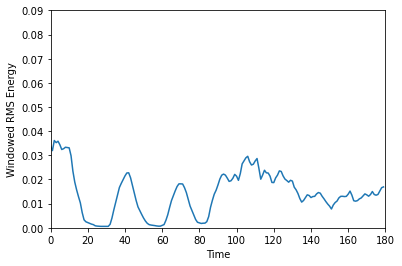

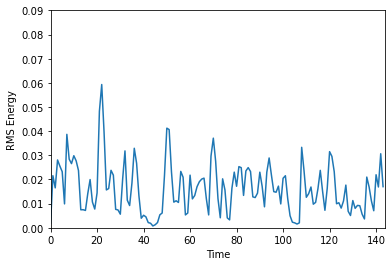

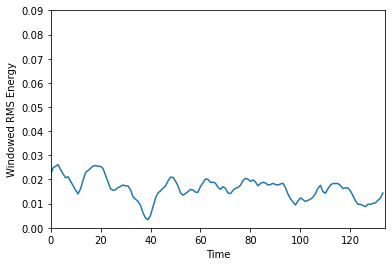

In [8]:
df = pd.DataFrame(columns = ['Spine_RMS_Distance_Score', 'Spine1_RMS_Distance_Score', 'Spine2_RMS_Distance_Score', 
                             'Spine3_RMS_Distance_Score', 'LeftShoulder_RMS_Distance_Score', 'LeftArm_RMS_Distance_Score', 
                             'LeftForeArm_RMS_Distance_Score', 'LeftHand_RMS_Distance_Score', 
                             'RightShoulder_RMS_Distance_Score', 'RightArm_RMS_Distance_Score', 
                             'RightForeArm_RMS_Distance_Score', 'RightHand_RMS_Distance_Score', 'Neck_RMS_Distance_Score', 
                             'Neck1_RMS_Distance_Score', 'Head_RMS_Distance_Score'])
Conds = ['Cond_BA']

for cond in Conds:
    for i in range(1,41):
        studyseq_motion_path = "../" + cond + "/joint_distances_between_frames/" + "StudySeq" + str(i) + ".csv"
        studyseq_motion = pd.read_csv(studyseq_motion_path).iloc[:,1:] # Drop the first column as it is indexing

        studyseq_audio_path = "StudySeq" + str(i) + ".wav"
        studyseq_audio, sr = librosa.load(studyseq_audio_path, sr=44100)

        frame_length = 2205 # Samples Per Frame = Sample Rate / FPS = 44100 / 20 = 2205
        hop_length = 2205

        studyseq_rms = librosa.feature.rms(studyseq_audio, hop_length=hop_length, frame_length=frame_length, center=False)[0]
        
        plt.figure()
        plt.plot(np.arange(0, len(studyseq_rms)), studyseq_rms)
        plt.xlabel('Time')
        plt.xlim(0,len(studyseq_rms))
        plt.ylim(0, 0.09)
        plt.ylabel('RMS Energy')
        
        # Need to do a check for the Studyseqs of Cond_M since some of the videos have 1 additional frame.
        num_of_frames_motion = studyseq_motion.shape[0] + 1
        num_of_frames_audio = np.size(studyseq_rms)
        window_length = 10 # for windowing
        if (cond == 'Cond_M' and num_of_frames_motion == num_of_frames_audio + 1):
            # If the Cond_M studyseq has an additional frame dont discard the last frame of audio:
            studyseq_motion_array = studyseq_motion.to_numpy()
            windowed_motion = np.asarray([sum(studyseq_motion_array[x:x+window_length]) for x in range(0,len(studyseq_motion_array) - window_length + 1)])
            
            windowed_audio = np.asarray([sum(studyseq_rms[x:x+window_length]) for x in range(0,len(studyseq_rms) - window_length + 1)])
            windowed_audio = np.tile(np.reshape(windowed_audio, (np.shape(windowed_audio)[0],1)), (1,np.shape(windowed_motion)[1]))
            print(np.shape(windowed_audio), np.shape(windowed_motion))
            studyseq_weighted_motion = np.mean(windowed_motion * windowed_audio, axis=0)
        else:
            # Weighting the joint distances between frames with the rms energy
            studyseq_motion_array = studyseq_motion.to_numpy()
            windowed_motion = np.asarray([sum(studyseq_motion_array[x:x+window_length]) for x in range(0,len(studyseq_motion_array) - window_length + 1)])

            studyseq_rms = studyseq_rms[:-1]
            windowed_audio = np.asarray([sum(studyseq_rms[x:x+window_length]) for x in range(0,len(studyseq_rms) - window_length + 1)])
            plt.figure()
            plt.plot(np.arange(0, len(windowed_audio)), windowed_audio/10)
            plt.xlabel('Time')
            plt.xlim(0,len(windowed_audio))
            plt.ylim(0, 0.09)
            plt.ylabel('Windowed RMS Energy')
            windowed_audio = np.tile(np.reshape(windowed_audio, (np.shape(windowed_audio)[0],1)), (1,np.shape(windowed_motion)[1]))
            studyseq_weighted_motion = np.mean(windowed_motion * windowed_audio, axis=0)

        
        # Adding Studyseq and Score to a dataframe
        idx = [x[:x.index("_")] + "_RMS_Distance_Score" for x in studyseq_motion.columns]
        rms_distance_series = pd.Series(data=studyseq_weighted_motion, index=idx, name=cond + "/StudySeq" + str(i))
        df = df.append(rms_distance_series)

# Computing Mean/Max/Min RMS Energy

In [5]:
df_rows = []

for i in range(1,41):
    studyseq_path = "StudySeq" + str(i) + ".wav"
    studyseq, sr = librosa.load(studyseq_path, sr=44100)
    frame_length = 2205 # Samples Per Frame = Sample Rate / FPS = 44100 / 20 = 2205
    hop_length = 2205
    
    studyseq_rms = librosa.feature.rms(studyseq, hop_length=hop_length, frame_length=frame_length, center=False)[0]
    studyseq_rms = studyseq_rms[:-1] # Discard last value as it doesnt affect the score
    
    df_rows = df_rows + [['StudySeq' + str(i), np.min(studyseq_rms), np.max(studyseq_rms), np.mean(studyseq_rms)]]
    print(np.size(studyseq_rms))
df_rms = pd.DataFrame(df_rows, columns=['StudySeq', 'min_RMS_Energy', 'max_RMS_Energy', 'mean_RMS_Energy'])
write_path = "../Appropriateness_Features/RMS_Energy_properties.csv"
df_rms.to_csv(write_path)

185
215
151
169
187
201
199
199
195
195
195
237
167
235
191
253
193
249
247
227
221
157
189
201
219
205
167
187
213
221
169
217
189
201
207
211
211
147
189
143


# Computing scores using Finite Differences

In [31]:
df = pd.DataFrame(columns = ['Spine_RMS_Distance_Score', 'Spine1_RMS_Distance_Score', 'Spine2_RMS_Distance_Score', 
                             'Spine3_RMS_Distance_Score', 'LeftShoulder_RMS_Distance_Score', 'LeftArm_RMS_Distance_Score', 
                             'LeftForeArm_RMS_Distance_Score', 'LeftHand_RMS_Distance_Score', 
                             'RightShoulder_RMS_Distance_Score', 'RightArm_RMS_Distance_Score', 
                             'RightForeArm_RMS_Distance_Score', 'RightHand_RMS_Distance_Score', 'Neck_RMS_Distance_Score', 
                             'Neck1_RMS_Distance_Score', 'Head_RMS_Distance_Score'])
Conds = ['Cond_BA', 'Cond_BT', 'Cond_N', 'Cond_M', 'Cond_SA', 'Cond_SB', 'Cond_SC', 'Cond_SD', 'Cond_SE']

for cond in Conds:
    for i in range(1,41):
        print(cond)
        studyseq_motion_path = "../" + cond + "/motion_coords/" + "StudySeq" + str(i) + "_joint_coords.csv"
        studyseq_motion = pd.read_csv(studyseq_motion_path)

        studyseq_audio_path = "StudySeq" + str(i) + ".wav"
        studyseq_audio, sr = librosa.load(studyseq_audio_path, sr=44100)

        frame_length = 2205 # Samples Per Frame = Sample Rate / FPS = 44100 / 20 = 2205
        hop_length = 2205

        studyseq_rms = librosa.feature.rms(studyseq_audio, hop_length=hop_length, frame_length=frame_length, center=False)[0]
        
        # Need to do a check for the Studyseqs of Cond_M since some of the videos have 1 additional frame.
        num_of_frames_motion = studyseq_motion.shape[0]
        num_of_frames_audio = np.size(studyseq_rms)
        #print(num_of_frames_motion, num_of_frames_audio)
        h = 2 # h where f'(x) ~= f(x+h/2)-f(x-h/2), h must be even and >0
        if (cond == 'Cond_M' and num_of_frames_motion == num_of_frames_audio + 1):
            # If the Cond_M studyseq has an additional frame discard the last frame of motion since it is just a duplicate anyway
            studyseq_motion = studyseq_motion.iloc[:-1,:]
            fd_audio = []
            fd_motion = []
            for j in range(int(h/2),len(studyseq_rms)-int(h/2)):
                motion_finite_difference = studyseq_motion.iloc[int(j+h/2),:].values - studyseq_motion.iloc[int(j-h/2),:].values
                # convert to distance
                motion_finite_difference = [x**2 for x in motion_finite_difference] 
                motion_finite_difference = [sum(motion_finite_difference[i:i+3]) for i in range(0, len(motion_finite_difference), 3)]
                motion_finite_difference = [np.sqrt(x)/h for x in motion_finite_difference]
                fd_motion = fd_motion + [motion_finite_difference]
                audio_finite_difference = studyseq_rms[int(j+h/2)] - studyseq_rms[int(j-h/2)]    
                fd_audio = fd_audio + [audio_finite_difference/h]
        else:
            # Weighting the joint distances between frames with the rms energy
            fd_audio = []
            fd_motion = []
            for j in range(int(h/2),len(studyseq_rms)-int(h/2)):
                motion_finite_difference = studyseq_motion.iloc[int(j+h/2),:].values - studyseq_motion.iloc[int(j-h/2),:].values
                motion_finite_difference = [x**2 for x in motion_finite_difference] 
                motion_finite_difference = [sum(motion_finite_difference[i:i+3]) for i in range(0, len(motion_finite_difference), 3)]
                motion_finite_difference = [np.sqrt(x)/h for x in motion_finite_difference]
                fd_motion = fd_motion + [motion_finite_difference]
                audio_finite_difference = studyseq_rms[int(j+h/2)] - studyseq_rms[int(j-h/2)]    
                fd_audio = fd_audio + [audio_finite_difference/h]
                
        motion_forward_difference = studyseq_motion.iloc[1].values - studyseq_motion.iloc[0].values
        motion_forward_difference = [x**2 for x in motion_forward_difference]
        motion_forward_difference = [sum(motion_forward_difference[i:i+3]) for i in range(0, len(motion_forward_difference), 3)] 
        
        motion_backward_difference = studyseq_motion.iloc[-1].values - studyseq_motion.iloc[-2].values
        motion_backward_difference = [x**2 for x in motion_backward_difference]
        motion_backward_difference = [sum(motion_backward_difference[i:i+3]) for i in range(0, len(motion_backward_difference), 3)]
        
        fd_motion = [motion_forward_difference] + fd_motion + [motion_backward_difference]
        
        audio_forward_difference = (studyseq_rms[1] - studyseq_rms[0])
        audio_backward_difference = (studyseq_rms[-1] - studyseq_rms[-2])
        fd_audio = [audio_forward_difference] + fd_audio + [audio_backward_difference]
        
        fd_motion = np.asarray(fd_motion)
        fd_audio = np.asarray(fd_audio)
        print(np.shape(fd_audio), np.shape(fd_motion))
        
        studyseq_weighted_motion = np.mean(np.multiply(fd_motion,np.expand_dims(fd_audio, axis=1)), axis=0)
        
        #plt.plot(np.arange(0, len(studyseq_rms)-h), fd_audio)
        #plt.figure()
        #plt.plot(np.arange(0, len(studyseq_rms)), studyseq_rms)
        #plt.figure()
        
        idx = ['Spine_RMS_Distance_Score', 'Spine1_RMS_Distance_Score', 'Spine2_RMS_Distance_Score', 
                             'Spine3_RMS_Distance_Score', 'LeftShoulder_RMS_Distance_Score', 'LeftArm_RMS_Distance_Score', 
                             'LeftForeArm_RMS_Distance_Score', 'LeftHand_RMS_Distance_Score', 
                             'RightShoulder_RMS_Distance_Score', 'RightArm_RMS_Distance_Score', 
                             'RightForeArm_RMS_Distance_Score', 'RightHand_RMS_Distance_Score', 'Neck_RMS_Distance_Score', 
                             'Neck1_RMS_Distance_Score', 'Head_RMS_Distance_Score']
        rms_distance_series = pd.Series(data=studyseq_weighted_motion, index=idx, name=cond + "/StudySeq" + str(i))
        df = df.append(rms_distance_series)
        
write_path = "../Appropriateness_Features/RMS_Distance_scores_fd.csv"
df.to_csv(write_path)
print(df)

df = (df - np.min(df))/(np.max(df) - np.min(df))
df = df + 0.01 # add 0.01 to scale to [1,2] instead of [0,1]
print(df)
write_path = "../Appropriateness_Features/RMS_Distance_scores_fd_scaled.csv"
df.to_csv(write_path)


Cond_BA
(186,) (186, 15)
Cond_BA
(216,) (216, 15)
Cond_BA
(152,) (152, 15)
Cond_BA
(170,) (170, 15)
Cond_BA
(188,) (188, 15)
Cond_BA
(202,) (202, 15)
Cond_BA
(200,) (200, 15)
Cond_BA
(200,) (200, 15)
Cond_BA
(196,) (196, 15)
Cond_BA
(196,) (196, 15)
Cond_BA
(196,) (196, 15)
Cond_BA
(238,) (238, 15)
Cond_BA
(168,) (168, 15)
Cond_BA
(236,) (236, 15)
Cond_BA
(192,) (192, 15)
Cond_BA
(254,) (254, 15)
Cond_BA
(194,) (194, 15)
Cond_BA
(250,) (250, 15)
Cond_BA
(248,) (248, 15)
Cond_BA
(228,) (228, 15)
Cond_BA
(222,) (222, 15)
Cond_BA
(158,) (158, 15)
Cond_BA
(190,) (190, 15)
Cond_BA
(202,) (202, 15)
Cond_BA
(220,) (220, 15)
Cond_BA
(206,) (206, 15)
Cond_BA
(168,) (168, 15)
Cond_BA
(188,) (188, 15)
Cond_BA
(214,) (214, 15)
Cond_BA
(222,) (222, 15)
Cond_BA
(170,) (170, 15)
Cond_BA
(218,) (218, 15)
Cond_BA
(190,) (190, 15)
Cond_BA
(202,) (202, 15)
Cond_BA
(208,) (208, 15)
Cond_BA
(212,) (212, 15)
Cond_BA
(212,) (212, 15)
Cond_BA
(148,) (148, 15)
Cond_BA
(190,) (190, 15)
Cond_BA
(144,) (144, 15)


(238,) (238, 15)
Cond_SE
(168,) (168, 15)
Cond_SE
(236,) (236, 15)
Cond_SE
(192,) (192, 15)
Cond_SE
(254,) (254, 15)
Cond_SE
(194,) (194, 15)
Cond_SE
(250,) (250, 15)
Cond_SE
(248,) (248, 15)
Cond_SE
(228,) (228, 15)
Cond_SE
(222,) (222, 15)
Cond_SE
(158,) (158, 15)
Cond_SE
(190,) (190, 15)
Cond_SE
(202,) (202, 15)
Cond_SE
(220,) (220, 15)
Cond_SE
(206,) (206, 15)
Cond_SE
(168,) (168, 15)
Cond_SE
(188,) (188, 15)
Cond_SE
(214,) (214, 15)
Cond_SE
(222,) (222, 15)
Cond_SE
(170,) (170, 15)
Cond_SE
(218,) (218, 15)
Cond_SE
(190,) (190, 15)
Cond_SE
(202,) (202, 15)
Cond_SE
(208,) (208, 15)
Cond_SE
(212,) (212, 15)
Cond_SE
(212,) (212, 15)
Cond_SE
(148,) (148, 15)
Cond_SE
(190,) (190, 15)
Cond_SE
(144,) (144, 15)
                    Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq1                        0.0              -9.108602e-07   
Cond_BA/StudySeq2                        0.0               7.140905e-05   
Cond_BA/StudySeq3                        0.0              

In [73]:
df

Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
Cond_BA/StudySeq183                  1.390298                   1.442076   
Cond_BA/StudySeq213                  1.220640                   1.315446   
Cond_BA/StudySeq149                  1.412064                   1.408507   
Cond_BA/StudySeq167                  1.342042                   1.376105   
Cond_BA/StudySeq185                  1.253650                   1.350262   
...                                       ...                        ...   
Cond_SE/StudySeq209                  1.298807                   1.353276   
Cond_SE/StudySeq209                  1.288502                   1.370250   
Cond_SE/StudySeq145                  1.263796                   1.335720   
Cond_SE/StudySeq187                  1.443882                   1.442897   
Cond_SE/StudySeq141                  1.306790                   1.387023   

                     Spine2_RMS_Distance_Score  Spine3_RMS_Distance_Score  \
Cond_BA/StudySeq183                   1.444163                   1.460826   
Cond_BA/StudySeq213                   1.340745                   1.288940   
Cond_BA/StudySeq149                   1.418959                   1.419759   
Cond_BA/StudySeq167                   1.399458                   1.378937   
Cond_BA/StudySeq185                   1.347991                   1.326953   
...                                        ...                        ...   
Cond_SE/StudySeq209                   1.356902                   1.331005   
Cond_SE/StudySeq209                   1.369855                   1.357201   
Cond_SE/StudySeq145                   1.348035                   1.307708   
Cond_SE/StudySeq187                   1.451738                   1.468037   
Cond_SE/StudySeq141                   1.411193                   1.391469   

                     LeftShoulder_RMS_Distance_Score  \
Cond_BA/StudySeq183                         1.442384   
Cond_BA/StudySeq213                         1.316463   
Cond_BA/StudySeq149                         1.409084   
Cond_BA/StudySeq167                         1.377021   
Cond_BA/StudySeq185                         1.352097   
...                                              ...   
Cond_SE/StudySeq209                         1.354010   
Cond_SE/StudySeq209                         1.371304   
Cond_SE/StudySeq145                         1.336485   
Cond_SE/StudySeq187                         1.443011   
Cond_SE/StudySeq141                         1.387674   

                     LeftArm_RMS_Distance_Score  \
Cond_BA/StudySeq183                    1.381913   
Cond_BA/StudySeq213                    1.266417   
Cond_BA/StudySeq149                    1.408799   
Cond_BA/StudySeq167                    1.376179   
Cond_BA/StudySeq185                    1.288756   
...                                         ...   
Cond_SE/StudySeq209                    1.291630   
Cond_SE/StudySeq209                    1.307611   
Cond_SE/StudySeq145                    1.302938   
Cond_SE/StudySeq187                    1.427481   
Cond_SE/StudySeq141                    1.371803   

                     LeftForeArm_RMS_Distance_Score  \
Cond_BA/StudySeq183                        1.526353   
Cond_BA/StudySeq213                        1.375513   
Cond_BA/StudySeq149                        1.530297   
Cond_BA/StudySeq167                        1.509069   
Cond_BA/StudySeq185                        1.383652   
...                                             ...   
Cond_SE/StudySeq209                        1.399709   
Cond_SE/StudySeq209                        1.414821   
Cond_SE/StudySeq145                        1.388717   
Cond_SE/StudySeq187                        1.601657   
Cond_SE/StudySeq141                        1.502509   

                     LeftHand_RMS_Distance_Score  \
Cond_BA/StudySeq183                     1.486184   
Cond_BA/StudySeq213                     1.353125   
Cond_BA/StudySeq149                     1.469845   
Cond_BA/StudySeq167         

In [38]:
fd_rms_distance_scores = pd.read_csv("../Appropriateness_Features/RMS_Distance_scores_fd.csv")

In [44]:
fd_rms_distance_scores.describe()

Unnamed: 0  Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
0    Cond_BA/StudySeq183                       0.0               1.594206e-05   
1    Cond_BA/StudySeq213                       0.0              -1.640516e-05   
2    Cond_BA/StudySeq149                       0.0               6.289161e-06   
3    Cond_BA/StudySeq167                       0.0              -4.101601e-06   
4    Cond_BA/StudySeq185                       0.0              -4.177250e-06   
..                   ...                       ...                        ...   
355  Cond_SE/StudySeq209                       0.0              -4.930728e-06   
356  Cond_SE/StudySeq209                       0.0               2.961140e-07   
357  Cond_SE/StudySeq145                       0.0              -9.797540e-06   
358  Cond_SE/StudySeq187                       0.0               1.403392e-05   
359  Cond_SE/StudySeq141                       0.0              -7.663590e-07   

     Spine2_RMS_Distance_Score  Spine3_RMS_Distance_Score  \
0                 1.590791e-05                   0.000011   
1                -1.643647e-05                  -0.000017   
2                 6.334236e-06                   0.000004   
3                -4.068563e-06                  -0.000002   
4                -4.601143e-06                  -0.000014   
..                         ...                        ...   
355              -4.939280e-06                  -0.000010   
356              -8.899418e-08                  -0.000008   
357              -9.742914e-06                  -0.000014   
358               1.419800e-05                   0.000013   
359              -7.652694e-07                   0.000002   

     LeftShoulder_RMS_Distance_Score  LeftArm_RMS_Distance_Score  \
0                           0.000028                    0.000028   
1                          -0.000033                   -0.000033   
2                           0.000012                    0.000012   
3                          -0.000003                   -0.000003   
4                          -0.000015                   -0.000016   
..                               ...                         ...   
355                        -0.000015                   -0.000014   
356                        -0.000006                   -0.000006   
357                        -0.000023                   -0.000023   
358                         0.000029                    0.000029   
359                         0.000002                    0.000002   

     LeftForeArm_RMS_Distance_Score  LeftHand_RMS_Distance_Score  \
0                      2.242021e-05                     0.000041   
1                     -3.018984e-05                    -0.000047   
2                      9.598700e-06                     0.000020   
3                     -3.214938e-07                    -0.000001   
4                     -2.650360e-05                    -0.000028   
..                              ...                          ...   
355                   -2.197031e-05                    -0.000026   
356                   -1.538116e-05                    -0.000012   
357                   -2.648107e-05                    -0.000038   
358                    2.627385e-05                     0.000045   
359                    5.648191e-06                     0.000005   

     RightShoulder_RMS_Distance_Score  RightArm_RMS_Distance_Score  \
0                            0.000041                     0.000027   
1                           -0.000047                    -0.000046   
2                            0.000020                     0.000018   
3                           -0.000001                     0.000005   
4                           -0.000029                    -0.000046   
..                                ...                          ...   
355                         -0.000026                    -0.000034   
356                         -0.000012                    -0.000025   
357                         -0.000038       

In [49]:
scaled_scores = fd_rms_distance_scores.iloc[:,1:] + 2
np.log(scaled_scores).describe()

Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
count                360.000000                 360.000000   
mean                   0.693148                   0.693147   
std                    0.000024                   0.000023   
min                    0.693041                   0.693047   
25%                    0.693147                   0.693142   
50%                    0.693147                   0.693147   
75%                    0.693147                   0.693150   
max                    0.693294                   0.693286   

       Spine2_RMS_Distance_Score  Spine3_RMS_Distance_Score  \
count                 360.000000                 360.000000   
mean                    0.693147                   0.693145   
std                     0.000023                   0.000026   
min                     0.693048                   0.693039   
25%                     0.693142                   0.693141   
50%                     0.693147                   0.693147   
75%                     0.693150                   0.693150   
max                     0.693286                   0.693294   

       LeftShoulder_RMS_Distance_Score  LeftArm_RMS_Distance_Score  \
count                       360.000000                  360.000000   
mean                          0.693145                    0.693145   
std                           0.000026                    0.000026   
min                           0.693054                    0.693055   
25%                           0.693137                    0.693137   
50%                           0.693147                    0.693147   
75%                           0.693153                    0.693153   
max                           0.693297                    0.693296   

       LeftForeArm_RMS_Distance_Score  LeftHand_RMS_Distance_Score  \
count                      360.000000                   360.000000   
mean                         0.693143                     0.693143   
std                          0.000030                     0.000032   
min                          0.693045                     0.693049   
25%                          0.693135                     0.693130   
50%                          0.693146                     0.693146   
75%                          0.693154                     0.693156   
max                          0.693300                     0.693306   

       RightShoulder_RMS_Distance_Score  RightArm_RMS_Distance_Score  \
count                        360.000000                   360.000000   
mean                           0.693143                     0.693142   
std                            0.000032                     0.000036   
min                            0.693048                     0.693026   
25%                            0.693130                     0.693129   
50%                            0.693146                     0.693146   
75%                            0.693156                     0.693157   
max                            0.693305                     0.693303   

       RightForeArm_RMS_Distance_Score  RightHand_RMS_Distance_Score  \
count                       360.000000                    360.000000   
mean                          0.693141                      0.693141   
std                           0.000042                      0.000044   
min                           0.693006                      0.692992   
25%                           0.693130                      0.693130   
50%                           0.693145                      0.693145   
75%                           0.693160                      0.693160   
max                           0.693297                      0.693299   

       Neck_RMS_Distance_Score  Neck1_RMS_Distance_Score  \
count               360.000000                360.000000   
mean                  0.693140                  0.693143   
std                   0.000043                  0.000043   
min                   0.693006                  0.692997   
25%                 

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0., 15.,  1.,  0.,
         1.,  0.,  1.,  0.,  1.,  4.,  0.,  1.,  1.,  1.,  0.,  2.,  3.,
         2.,  1.,  4.,  8., 16.,  6.,  6., 14., 10., 20., 24., 29., 42.,
        35., 26., 13., 12.,  6.,  8., 10.,  2.,  8.,  2.,  0.,  3.,  1.,
         1.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  3.,  0.,  2.,  1.,  1.,
         0.,  0.,  0.,  3.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.84610575e-04, -1.79793499e-04, -1.74976424e-04, -1.70159348e-04,
        -1.65342273e-04, -1.60525197e-04, -1.55708121e-04, -1.50891046e-04,
        -1.46073970e-04, -1.41256895e-04, -1.36439819e-04, -1.31622743e-04,
        -1.26805668e-04, -1.21988592e-04, -1.17171517e-04, -1.12354441e-04,
        -1.07537366e-04, -1.02720290e-04, -9.79032144e-05, -9.30861388e-05,
        -8.82690632e-05, -8.34519876e-05, -7.86349120e

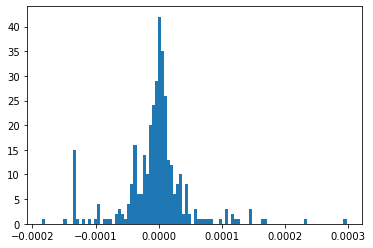

In [61]:
plt.hist(fd_rms_distance_scores.iloc[:,6], bins=100)

In [56]:
minmax = (fd_rms_distance_scores.iloc[:,1:] - np.min(fd_rms_distance_scores.iloc[:,1:]))/(np.max(fd_rms_distance_scores.iloc[:,1:]) - np.min(fd_rms_distance_scores.iloc[:,1:]))

In [58]:
describe()

Spine_RMS_Distance_Score  Spine1_RMS_Distance_Score  \
count                360.000000                 360.000000   
mean                   0.421081                   0.418020   
std                    0.093377                   0.095577   
min                    0.000000                   0.000000   
25%                    0.419483                   0.395396   
50%                    0.419483                   0.417316   
75%                    0.419483                   0.430497   
max                    1.000000                   1.000000   

       Spine2_RMS_Distance_Score  Spine3_RMS_Distance_Score  \
count                 360.000000                 360.000000   
mean                    0.418197                   0.415333   
std                     0.096082                   0.102319   
min                     0.000000                   0.000000   
25%                     0.395861                   0.400231   
50%                     0.417568                   0.422384   
75%                     0.430965                   0.436659   
max                     1.000000                   1.000000   

       LeftShoulder_RMS_Distance_Score  LeftArm_RMS_Distance_Score  \
count                       360.000000                  360.000000   
mean                          0.375219                    0.374166   
std                           0.107061                    0.108484   
min                           0.000000                    0.000000   
25%                           0.341374                    0.340038   
50%                           0.382436                    0.381297   
75%                           0.409151                    0.408217   
max                           1.000000                    1.000000   

       LeftForeArm_RMS_Distance_Score  LeftHand_RMS_Distance_Score  \
count                      360.000000                   360.000000   
mean                         0.383760                     0.365429   
std                          0.119841                     0.124317   
min                          0.000000                     0.000000   
25%                          0.351315                     0.315128   
50%                          0.396489                     0.376310   
75%                          0.427069                     0.417511   
max                          1.000000                     1.000000   

       RightShoulder_RMS_Distance_Score  RightArm_RMS_Distance_Score  \
count                        360.000000                   360.000000   
mean                           0.369634                     0.417332   
std                            0.125152                     0.129101   
min                            0.000000                     0.000000   
25%                            0.319674                     0.371846   
50%                            0.380131                     0.432337   
75%                            0.421819                     0.472823   
max                            1.000000                     1.000000   

       RightForeArm_RMS_Distance_Score  RightHand_RMS_Distance_Score  \
count                       360.000000                    360.000000   
mean                          0.464795                      0.483078   
std                           0.144148                      0.143795   
min                           0.000000                      0.000000   
25%                           0.426808                      0.447772   
50%                           0.477225                      0.495958   
75%                           0.528144                      0.544769   
max                           1.000000                      1.000000   

       Neck_RMS_Distance_Score  Neck1_RMS_Distance_Score  \
count               360.000000                360.000000   
mean                  0.457966                  0.347856   
std                   0.146102                  0.101186   
min                   0.000000                  0.000000   
25%                 

(array([14.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         1.,  2.,  0.,  0.,  6.,  1.,  1.,  0.,  4.,  1.,  4.,  2., 19.,
         4.,  2.,  6., 13., 13., 12., 15., 20., 29., 32., 39., 18., 17.,
        12., 12., 12.,  7.,  3.,  3.,  4.,  2.,  2.,  3.,  2.,  1.,  2.,
         1.,  0.,  4.,  1.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.00693147, 0.01386294, 0.02079442, 0.02772589,
        0.03465736, 0.04158883, 0.0485203 , 0.05545177, 0.06238325,
        0.06931472, 0.07624619, 0.08317766, 0.09010913, 0.09704061,
        0.10397208, 0.11090355, 0.11783502, 0.12476649, 0.13169796,
        0.13862944, 0.14556091, 0.15249238, 0.15942385, 0.16635532,
        0.1732868 , 0.18021827, 0.18714974, 0.19408121, 0.20101268,
        0.20794415, 0.2148

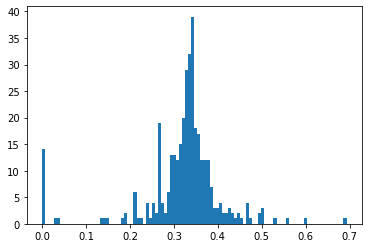

In [66]:
plt.hist(np.log(minmax.iloc[:,6]+1), bins=100)

(array([14.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  6.,  1.,  1.,
         2.,  3.,  4.,  1., 20.,  4.,  3.,  8., 13., 15., 15., 14., 30.,
        28., 35., 32., 16., 14., 12., 12., 10.,  4.,  3.,  4.,  3.,  2.,
         1.,  4.,  0.,  1.,  2.,  1.,  0.,  3.,  1.,  1.,  0.,  1.,  1.,
         3.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.

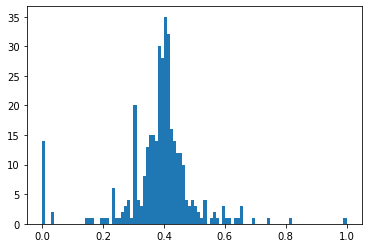

In [67]:
plt.hist(minmax.iloc[:,6], bins=100)